# Python and MySQL

In [8]:
# First step is always import the necessary packages
import pymysql

## Connections and Cursors
With SQL, just as with Mongo, we need to first create a **connection** to our database. Through this connection we can retreive database meta data, but can also instantiate a **curosr**.
 - Just as with Mongo, the **cursor** is used to interact with the database and will store the results of any executed queries

In [34]:
import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='gwumysql-restore.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='EMSE6992',
                             port=3306,
                             db='EMSE6992',
                             password='MySQLpass')

#From our connection we need a cursor, which acts as our interface into the database
cur = connection.cursor()

SQL **cursor** objects have a basic functional loop:
 1. **cursor**.execute(_query_)
  - The **cursor** must first execute a _query_ whoes response may be stored within the **cursor**
 2. **cursor**._fetch_() or *iterate through the cursor*
  - Once executed, the results of a _query_ can be retreived from the **cursor**, if any results exist
  
*NOTE: This is a different functional loop from __Mongo's__ cursor loop*

In [3]:
#From a cursor we can execute SQL directly
res = cur.execute("Select * From users LIMIT 5")
print(f"The number of rows returned: {res}") #the output from execute() will be the number of records returned

The number of rows returned: 5


Now we can *fetch* the results (*__fetchall()__ will return all records*):

In [4]:
users = cur.fetchall()
for user in users:
    print(user) # We can now take a look at what was returned
    break

(datetime.date(2018, 5, 25), "creator of knowyourmeme's meme of the day 15th november 2019 - @AetherionArt did the avatar & @macagilart did the header", 18739, 1188, '1000026776872144897', 21, None, 'fooly', 'mashcore4mums', 20970, None, None)


In [5]:
res = cur.execute("Select * From users LIMIT 5")
for user in users:
    print(user)
    break

(datetime.date(2018, 5, 25), "creator of knowyourmeme's meme of the day 15th november 2019 - @AetherionArt did the avatar & @macagilart did the header", 18739, 1188, '1000026776872144897', 21, None, 'fooly', 'mashcore4mums', 20970, None, None)


Each **execute()** refreshes the information stored in the **cursor**, meaning we can continously query the database.

Here we see that by calling **fetchone()** rather than **fetchall()** we won't get a list, but rather directly access the top _tuple_

In [6]:
cur.execute("Select * From users")

data = cur.fetchone()
data

(datetime.date(2018, 5, 25),
 "creator of knowyourmeme's meme of the day 15th november 2019 - @AetherionArt did the avatar & @macagilart did the header",
 18739,
 1188,
 '1000026776872144897',
 21,
 None,
 'fooly',
 'mashcore4mums',
 20970,
 None,
 None)

In [7]:
cur.execute("Select * From users")

data = cur.fetchall()
len(data)

86202

## Dict Cursor
We can define types of cursors when connecting to a database, which alters the format of the returned data
 - Done by adding a _cursorclass_ param to our connection

In [9]:
connection = pymysql.connect(host='gwumysql-restore.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='EMSE6992',
                             port=3306,
                             db='EMSE6992',
                             password='MySQLpass',
                             cursorclass=pymysql.cursors.DictCursor) # This is the significant line!

cur = connection.cursor()

In [10]:
cur.execute("SELECT * FROM users LIMIT 1;")
cur.fetchone()

{'created_date': datetime.date(2018, 5, 25),
 'description': "creator of knowyourmeme's meme of the day 15th november 2019 - @AetherionArt did the avatar & @macagilart did the header",
 'favorites_count': 18739,
 'friends_count': 1188,
 'user_id': '1000026776872144897',
 'listed_count': 21,
 'location': None,
 'name': 'fooly',
 'screen_name': 'mashcore4mums',
 'statuses_count': 20970,
 'url': None,
 'verified': None}

# In Class Work
Create a connection to the **EMSE6992 database** and run a query to determine how many users have tweeted more than 1,000 times, using the **statuses table**:

*Expected Result: 8 users*

In [ ]:
# Space for work


How Could we implement this in Mongo?

----

## SQL - Dataframe Compatibility
Given that both SQL and Dataframes both work with tabular data, it makes these two technologies easily integratable.

In [11]:
import pandas as pd

res = cur.execute("Select * From users LIMIT 100")
users = cur.fetchall()

Since the cursor returns a list of dictionaries, we are setup to dump the data into a pandas DataFrame

In [12]:
df = pd.DataFrame.from_dict(users)
df[:5]

,created_date,description,favorites_count,friends_count,user_id,listed_count,location,name,screen_name,statuses_count,url,verified
0,2018-05-25,creator of knowyourmeme's meme of the day 15th...,18739.0,1188.0,1000026776872144897,21.0,None,fooly,mashcore4mums,20970,None,NaN
1,2018-05-25,-_-,5281.0,120.0,1000073751457824768,NaN,uncomfortable,Cas,Amai_Neo,1260,None,NaN
2,2018-05-25,Lifelong learner. \n\nD2C brands + iOS & Shopi...,4240.0,385.0,1000084374468128768,10.0,Earth,Max Grev,max_grev,855,https://t.co/J7KuZFVRRI,NaN
3,2009-12-28,Be an encourager. The World has plenty of crit...,4566.0,477.0,100009243,1.0,"Leicester, England",Aakash Jabbar,mangianees,3816,https://t.co/Afy69InVdg,NaN
4,2009-12-28,Culture Writer | I Get It In Ohio - Just using...,106836.0,2069.0,100009746,26.0,"Columbus, OH",Stimmy Lovato,MikeishaDache,178768,https://t.co/IILZF0YLqw,NaN


This obviously allows us to work with the data with a more robust API

In [13]:
df.drop('verified', axis=1, inplace=True)
print(df.groupby(['created_date']).mean())

              favorites_count  friends_count  listed_count  statuses_count
created_date                                                              
2007-11-06         947.000000     420.000000  21112.000000   363488.000000
2009-12-28       30468.818182     607.545455    243.222222    41672.636364
2009-12-29        3275.250000    1223.750000    513.750000    72326.000000
2012-12-09       22373.500000     723.000000           NaN     6708.000000
2012-12-10       18302.000000     744.666667     20.714286    12219.666667
2018-05-25       10281.000000     461.250000     11.666667     6263.250000
2018-05-26       33416.266667     946.400000     29.666667    10082.000000
2018-05-27       20586.333333     230.555556      7.200000    18210.333333
2018-05-28       20539.866667    1392.200000     33.545455     9590.800000
2018-05-29       33173.933333     577.200000     28.545455    14812.666667
2018-05-30       20223.615385     541.538462     44.777778    12599.230769
2018-05-31       36709.00

### We can also read data directly into pandas

By passing a connection object into pandas' **read_sql(_query_, _conn_)** we can create DataFrame's directly from a query.

In [14]:
conn = pymysql.connect(host='gwumysql-restore.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='EMSE6992',
                             port=3306,
                             db='EMSE6992',
                             password='MySQLpass')

df = pd.read_sql("SELECT users.screen_name, users.user_id, users.favorites_count FROM users JOIN statuses On users.user_id = statuses.user_id limit 10", conn)
df

,screen_name,user_id,favorites_count
0,mashcore4mums,1000026776872144897,18739
1,mashcore4mums,1000026776872144897,18739
2,mashcore4mums,1000026776872144897,18739
3,mashcore4mums,1000026776872144897,18739
4,Amai_Neo,1000073751457824768,5281
5,Amai_Neo,1000073751457824768,5281
6,max_grev,1000084374468128768,4240
7,mangianees,100009243,4566
8,MikeishaDache,100009746,106836
9,MikeishaDache,100009746,106836


# In Class Work
Using a SQL query, populate a dataframe with the total number of statuses made per location. Using the dataframe, create a histogram and bar plot. Limit your results to the top 25 results.

*Note: location is a user field*

*Hint: Dataframes have a `Dataframe.plot.bar()` and a `Dataframe.plot.hist()` method built into them.*

<AxesSubplot:xlabel='location'>

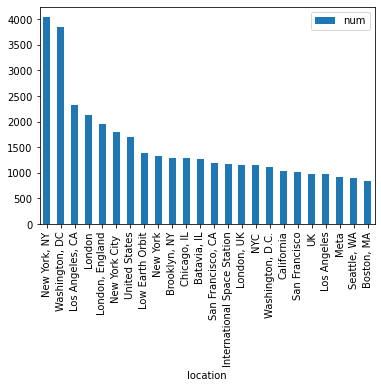

In [29]:
# Space for work
import matplotlib.pyplot as plt

df_class = pd.read_sql("""
SELECT location, count(*) as num FROM statuses 
    INNER JOIN users
    On users.user_id = statuses.user_id 
GROUP BY location 
ORDER BY num DESC
""", conn)

df_class['location'] = df_class['location'].astype('str')
df_class[1:25].plot.bar(x='location', y='num')

## Table Alterations
Whenever executing a query that will alter the information in a database (creating/removing/altering tables/records) we need to commit those changes

In [ ]:
query = "INSERT INTO statuses (list of cols) VALUES (place for values)"
cur.execute(query)

# NOTE: We commit using the connection!
conn.commit()

## IN Class Work
Insert yourself as a **movie** into the **movies** table

*Note: You must include a title and year**

In [ ]:
# Space for work
cur = 

## Extra - Input Sanitzation
This is more a consideration for developing applications, but an important principal of working with databases is sanitization

<img src='https://imgs.xkcd.com/comics/exploits_of_a_mom.png'>

In [ ]:
title = "Robert'); Drop Table movie_data;"
{cursor_object}.execute(f"INSERT INTO movie_data (title, year) VALUES ({name}, '2020')")